In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
end=dt.datetime.now()
start=dt.datetime(end.year-10,end.month,end.day)

In [3]:
Asset='^GSPC'

In [4]:
price=reader.get_data_yahoo(Asset,start,end)['Adj Close']
returns=price.pct_change().resample('Y').agg(lambda x: (x+1).prod()-1)#yearly cumulative aggregated return
returns
df_ret=returns.reset_index()
df_ret

,Date,Adj Close
0,2012-12-31,0.005683
1,2013-12-31,0.296012
2,2014-12-31,0.113906
3,2015-12-31,-0.007266
4,2016-12-31,0.095350
5,2017-12-31,0.194200
6,2018-12-31,-0.062373
7,2019-12-31,0.288781
8,2020-12-31,0.162589
9,2021-12-31,0.268927


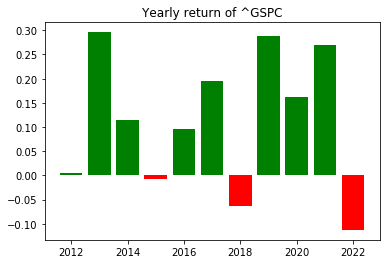

In [5]:
plt.bar(df_ret.Date.dt.year,df_ret['Adj Close'],
       color=(df_ret['Adj Close'] > 0).map({True:'green',False:'red'}))
plt.title(f'Yearly return of {Asset}')
plt.show()

In [6]:
#2022 was a bad time for S&P500 investors